In [1]:
%matplotlib inline

In [2]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 5                                               #
#                                                            #
##############################################################

from util.VisualizeDataset import VisualizeDataset
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import copy
import pandas as pd
import matplotlib.pyplot as plot
import util.util as util
import warnings
warnings.filterwarnings('ignore')

### Exercise 5.1
We have focused on the phone’s accelerometer data in our clustering, but did not touch upon the other sensors. Cluster the gyroscope data for the crowdsignals dataset using k-means, k-medoids, and hierarchical clustering. Do you see a similar clustering as we have seen for the accelerometer data? And how do the clusters relate to the activity?

#### The accelerometer data:

In [3]:
# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter4_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
dataset.index = dataset.index.to_datetime()

# First let us use non hierarchical clustering.

clusteringNH = NonHierarchicalClustering()



===== kmeans clustering =====
k =  2
silhouette =  0.4262282379946944
k =  3
silhouette =  0.5348162447516348
k =  4
silhouette =  0.6356394712656175
k =  5
silhouette =  0.6810104947521859
k =  6
silhouette =  0.7425841388574435
k =  7
silhouette =  0.740001874212922
k =  8
silhouette =  0.7369478588777693
k =  9
silhouette =  0.7093719526137005


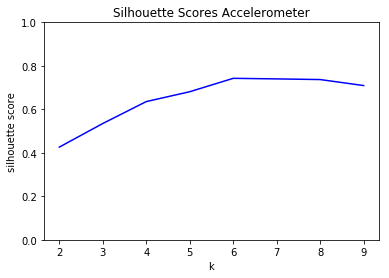

In [12]:
# Let us look at k-means first.

k_values = range(2, 10)
silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.title("Silhouette Scores Accelerometer")
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()



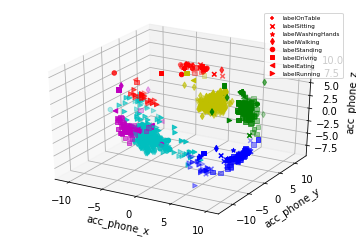

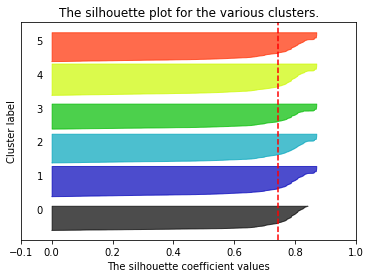

\multirow{2}{*}{ acc_phone_x } & mean   &  -0.36  &  8.24  &  8.00  &  -0.75  &  -8.21  &  -0.56 \\
 & std   &  1.15  &  0.96  &  1.02  &  1.71  &  0.94  &  1.21 \\
\multirow{2}{*}{ acc_phone_y } & mean   &  0.98  &  0.61  &  -2.35  &  -9.61  &  2.25  &  9.55 \\
 & std   &  1.92  &  1.36  &  2.06  &  1.22  &  1.94  &  1.12 \\
\multirow{2}{*}{ acc_phone_z } & mean   &  9.19  &  4.54  &  -4.80  &  0.23  &  -4.67  &  -0.56 \\
 & std   &  1.06  &  1.36  &  1.08  &  1.49  &  1.44  &  1.62 \\
labelOnTable  & percentage   &  99.56 \%  &  0.44 \%  &  0.00 \%  &  0.00 \%  &  0.00 \%  &  0.00 \% \\
labelSitting  & percentage   &  2.40 \%  &  0.40 \%  &  97.20 \%  &  0.00 \%  &  0.00 \%  &  0.00 \% \\
labelWashingHands  & percentage   &  7.02 \%  &  1.75 \%  &  1.75 \%  &  56.14 \%  &  0.00 \%  &  33.33 \% \\
labelWalking  & percentage   &  1.87 \%  &  0.94 \%  &  0.47 \%  &  46.14 \%  &  0.47 \%  &  50.12 \% \\
labelStanding  & percentage   &  4.74 \%  &  1.42 \%  &  0.00 \%  &  48.34 \%  &  0.4

In [5]:
# And run the knn with the highest silhouette score

k = 6

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []





===== agglomaritive clustering =====
k =  2
silhouette =  0.40723374534530976


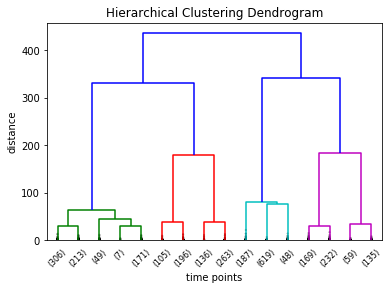

k =  3
silhouette =  0.5019390948206321
k =  4
silhouette =  0.6345486282226208
k =  5
silhouette =  0.6788716900628495
k =  6
silhouette =  0.730042663956915
k =  7
silhouette =  0.7203628574989319
k =  8
silhouette =  0.7293167196858152
k =  9
silhouette =  0.6604087243164882


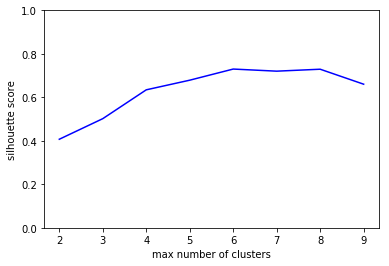

In [6]:
# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['acc_phone_x', 'acc_phone_y', 'acc_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()

#### The gyroscope data:

===== kmeans clustering =====
k =  2
silhouette =  0.6516851950601088
k =  3
silhouette =  0.6535602431877401
k =  4
silhouette =  0.6743770786725156
k =  5
silhouette =  0.68482023591259
k =  6
silhouette =  0.6693284787316682
k =  7
silhouette =  0.6525709702058001
k =  8
silhouette =  0.6555002400167353
k =  9
silhouette =  0.655713656780245


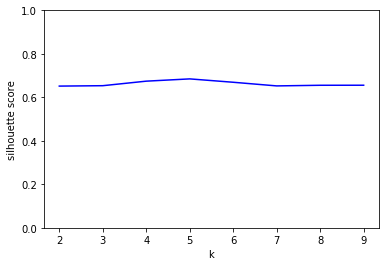

In [9]:
# k-means first.

silhouette_values = []
#
## Do some initial runs to determine the right number for k
#
print '===== kmeans clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)

plot.plot(k_values, silhouette_values, 'b-')
plot.title("Silhouette Scores Accelerometer")
plot.xlabel('k')
plot.ylabel('silhouette score')
plot.ylim([0,1])
plot.show()

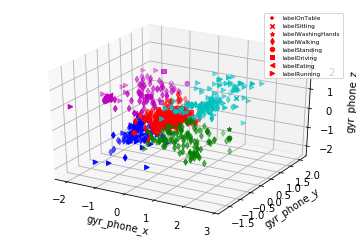

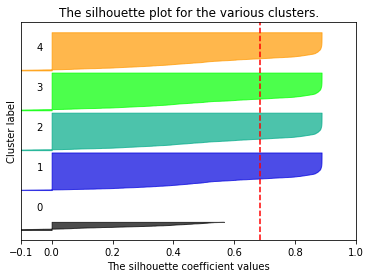

\multirow{2}{*}{ gyr_phone_x } & mean   &  -0.01  &  0.80  &  -0.91  &  1.17  &  -1.09 \\
 & std   &  0.15  &  0.43  &  0.39  &  0.42  &  0.43 \\
\multirow{2}{*}{ gyr_phone_y } & mean   &  0.04  &  -0.37  &  -0.14  &  0.31  &  0.16 \\
 & std   &  0.22  &  0.59  &  0.51  &  0.56  &  0.58 \\
\multirow{2}{*}{ gyr_phone_z } & mean   &  0.01  &  -0.50  &  -0.83  &  1.02  &  0.80 \\
 & std   &  0.12  &  0.47  &  0.41  &  0.47  &  0.33 \\
labelOnTable  & percentage   &  100.00 \%  &  0.00 \%  &  0.00 \%  &  0.00 \%  &  0.00 \% \\
labelSitting  & percentage   &  98.80 \%  &  0.00 \%  &  0.80 \%  &  0.40 \%  &  0.00 \% \\
labelWashingHands  & percentage   &  91.23 \%  &  1.75 \%  &  5.26 \%  &  1.75 \%  &  0.00 \% \\
labelWalking  & percentage   &  28.57 \%  &  21.31 \%  &  18.50 \%  &  15.46 \%  &  16.16 \% \\
labelStanding  & percentage   &  96.21 \%  &  1.42 \%  &  0.47 \%  &  0.47 \%  &  1.42 \% \\
labelDriving  & percentage   &  98.06 \%  &  0.56 \%  &  0.28 \%  &  0.00 \%  &  1.11 \% \\
l

In [10]:
# KNN with the highest silhouette score

k = 5

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')
del dataset_knn['silhouette']


k_values = range(2, 10)
silhouette_values = []

===== agglomaritive clustering =====
k =  2
silhouette =  0.6676832244147044


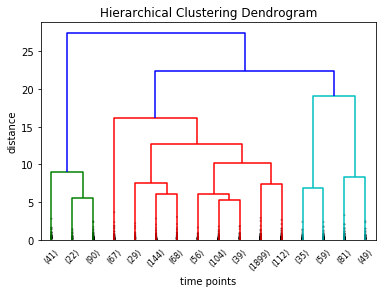

k =  3
silhouette =  0.6623398255090682
k =  4
silhouette =  0.674432809776737
k =  5
silhouette =  0.6855873627560384
k =  6
silhouette =  0.60381087976861
k =  7
silhouette =  0.6002214412293737
k =  8
silhouette =  0.6002559752038632
k =  9
silhouette =  0.6003549065297462


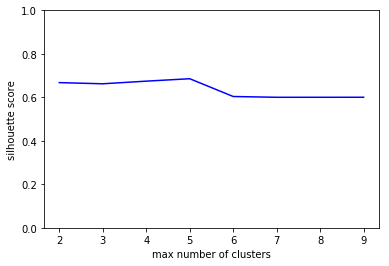

In [11]:
# Hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print '===== agglomaritive clustering ====='
for k in k_values:
    print 'k = ', k
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print 'silhouette = ', silhouette_score
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

plot.plot(k_values, silhouette_values, 'b-')
plot.ylim([0,1])
plot.xlabel('max number of clusters')
plot.ylabel('silhouette score')
plot.show()